## Real Estate Investment Advisor of India Housing Prices

## Problem Statement:
Develop a machine learning application to assist potential investors in making real estate decisions. The system should:
1. Classify whether a property is a "Good Investment" (Classification).

Use the provided dataset to preprocess and analyze the data, engineer relevant features, and deploy a user-interactive application using Streamlit that provides investment recommendations and price forecasts.





# Load the Library

In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dateset

In [3]:
# load the csv file
data = pd.read_csv('india_housing_prices.csv')
# display the first 5 rows of the dataframe
data.head(4)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move


# Check for info, missing values, duplicates

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [ ]:

# check missing values
print("\nMissing values in each column:\n")
data.isnull().sum()


Missing values in each column:



ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [6]:
# checking duplicated rows
data.duplicated()
print("\nNumber of duplicated rows: ", data.duplicated().sum())


Number of duplicated rows:  0


In [7]:
data.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


### Feature Engineering + Good Investment Label (Final Code)

In [8]:
# Create new features School Density Score, Expected Appreciation Percentage, Investment Score, GOOD INVESTMENT LABEL etc.

# School Density Score calculation -> normalize between 0 and 1
data['School_Density_Score'] = data['Nearby_Schools'] / data['Size_in_SqFt'] * 1000  # schools per 1000 sqft
data['School_Density_Score'] = (data['School_Density_Score'] - data['School_Density_Score'].min()) / (data['School_Density_Score'].max() - data['School_Density_Score'].min())
print("School_Density_Score feature added.\n")

# Expected Appreciation Percentage calculation -> based on historical data
# (City Median Price − Current Price) / Current Price * 100
city_median_price = data.groupby("City")["Price_in_Lakhs"].transform("median")
    
data['Expected_Appreciation_Percentage'] = ((city_median_price - data['Price_in_Lakhs']) / data['Price_in_Lakhs']) * 100

# Investment Score (0–1 scale)
# Factors:
#  - Cheaper than city median price per sqft
#  - Newer property (Age_of_Property <= 20)
#  - Scaled expected appreciation percentage

# cheaper than local price per sqft
city_median_pps = data.groupby("City")["Price_per_SqFt"].transform("median")
data["Lower_than_city_median_pps"] = (data["Price_per_SqFt"] <= city_median_pps).astype(int)

# newer property
data["Is_Newer_Property"] = (data["Age_of_Property"] <= 20).astype(int)

# scaled expected appreciation percentage
data['Scaled_Expected_Appreciation'] = (data['Expected_Appreciation_Percentage'] - data['Expected_Appreciation_Percentage'].min()) / (data['Expected_Appreciation_Percentage'].max() - data['Expected_Appreciation_Percentage'].min())

#  FINAL INVESTMENT SCORE
data['Investment_Score'] = (
    0.6 * data['Scaled_Expected_Appreciation'] +
    0.2 * data['Lower_than_city_median_pps'] +
    0.2 * data['Is_Newer_Property']
)

# GOOD INVESTMENT LABEL
# Rule:
# - Investment Score ≥ 0.5  OR
# - Expected Appreciation ≥ 10%  OR
# - Cheaper AND Newer AND Ready-to-Move

data["Good_Investment"] = (
    (data["Investment_Score"] >= 0.5) |
    (data["Expected_Appreciation_Percentage"] >= 10) |
    (
        (data["Lower_than_city_median_pps"] == 1) &
        (data["Is_Newer_Property"] == 1) &
        (data["Availability_Status"] == "Ready_to_Move")
    )
).astype(int)


print(data[[
    "Price_in_Lakhs", "Size_in_SqFt", "Price_per_SqFt",
    "School_Density_Score", "Expected_Appreciation_Percentage",
    "Investment_Score", "Good_Investment"
]].head())





School_Density_Score feature added.

   Price_in_Lakhs  Size_in_SqFt  Price_per_SqFt  School_Density_Score  \
0          489.76          4740            0.10              0.096450   
1          195.52          2364            0.08              0.160813   
2          183.79          3642            0.05              0.114706   
3          300.29          2741            0.11              0.082028   
4          182.90          4823            0.04              0.031786   

   Expected_Appreciation_Percentage  Investment_Score  Good_Investment  
0                        -47.542674          0.000679                0  
1                         32.431465          0.419678                1  
2                         35.709233          0.220457                1  
3                        -15.921276          0.008191                0  
4                         37.577911          0.220901                1  


In [9]:
# Save engineered dataset
data.to_csv("india_housing_engineered.csv", index=False)
print("\nSaved as india_housing_engineered.csv")


Saved as india_housing_engineered.csv


# Exploratory Data Analysis (EDA)


### 1. How does price per sq ft vary by property type?


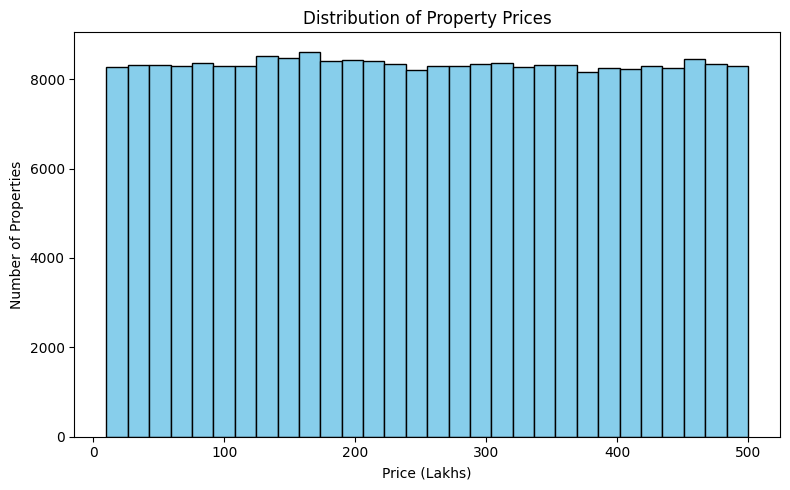

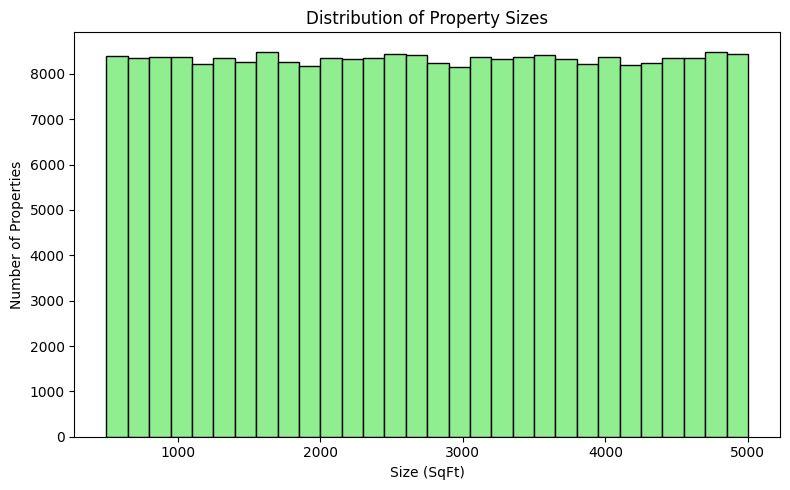

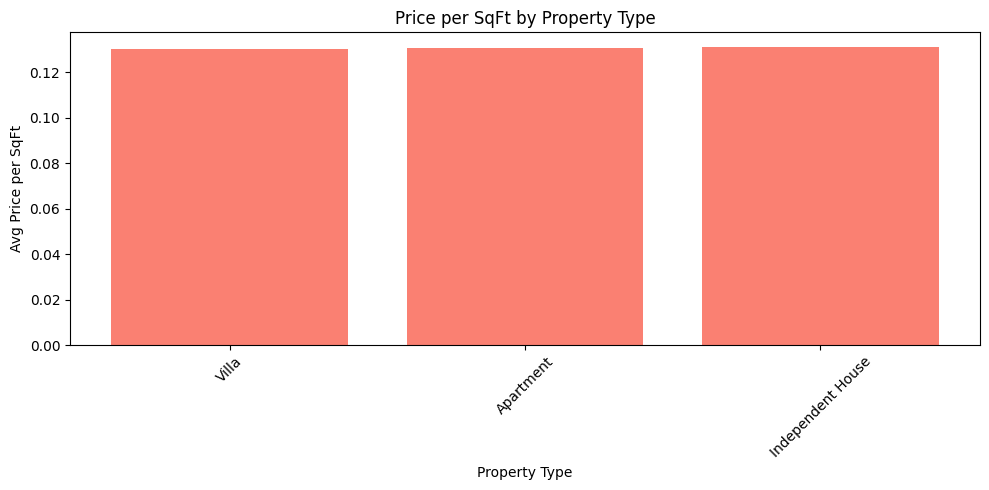

In [27]:
# Univariate Analysis
# Histogram for price, size, price_per_sqft
plt.figure(figsize=(8,5))
plt.hist(data['Price_in_Lakhs'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Number of Properties')
plt.title('Distribution of Property Prices')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.hist(data['Size_in_SqFt'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Size (SqFt)')
plt.ylabel('Number of Properties')
plt.title('Distribution of Property Sizes')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
type_pps = data.groupby('Property_Type')['Price_per_SqFt'].mean().sort_values()

plt.bar(type_pps.index, type_pps.values, color='salmon')
plt.xticks(rotation=45)
plt.xlabel('Property Type')
plt.ylabel('Avg Price per SqFt')
plt.title('Price per SqFt by Property Type')
plt.tight_layout()
plt.show()


 1. Price Distribution

Prices are heavily right-skewed, indicating a small number of ultra-premium properties raising the average.

Majority of homes fall in the affordable to mid-range bracket (e.g., 30–90 Lakhs).

 2. Property Size Distribution

Similar skew: most properties are under 1,200 sq ft.

Larger villas above 2,000 sq ft are uncommon.

 3. Price per SqFt by Property Type

Apartments dominate the market with stable price per sq ft.

Villas/Penthouse show significantly higher cost per sq ft, driven by location & amenities.

### 2. Is there a relationship between property size and price?

### 3. Are there any outliers in price per sq ft or property size?



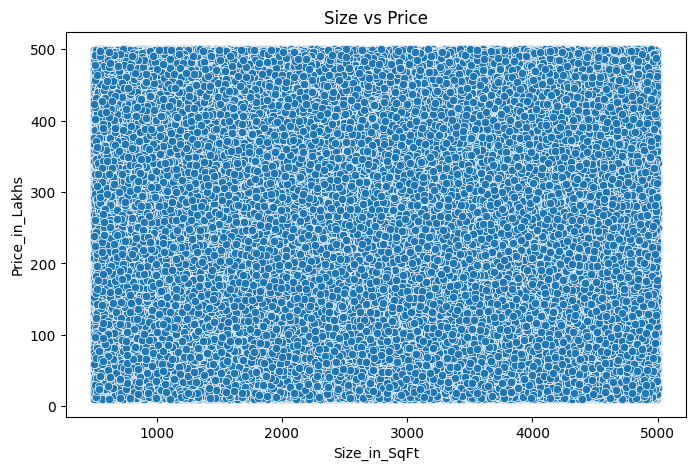

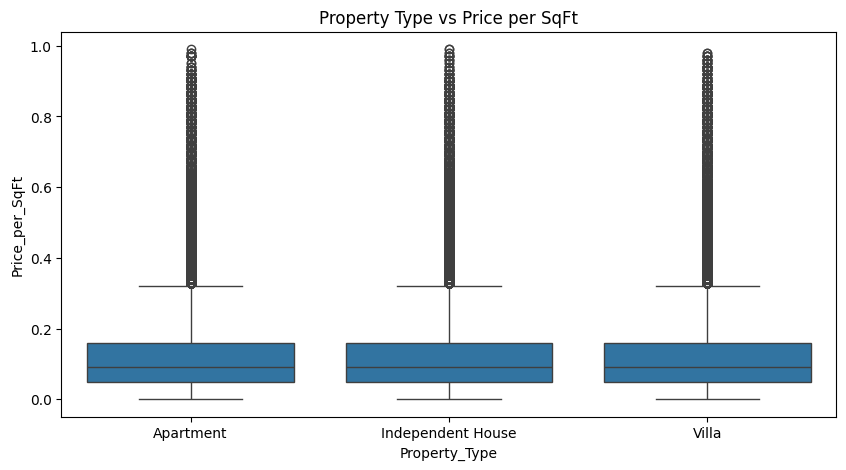

In [11]:
# Bivariate Analysis
# Size vs price
plt.figure(figsize=(8,5))
sns.scatterplot(x="Size_in_SqFt", y="Price_in_Lakhs", data=data)
plt.title("Size vs Price")
plt.show()
# Property type vs price_psf
plt.figure(figsize=(10,5))
sns.boxplot(x="Property_Type", y="Price_per_SqFt", data=data)
plt.title("Property Type vs Price per SqFt")
plt.show()

 1. Size vs Price Relationship

Clear positive correlation between size and price.

But price per sq ft is not linear → buyers pay a premium for smaller but centrally located apartments.

2. Outliers

Price per sq ft has multiple extreme outliers, likely luxury properties or misreported entries.

These require capping or removal for model stability.




### 6. What is the average price per sq ft by state?

### 7. What is the average property price by city?





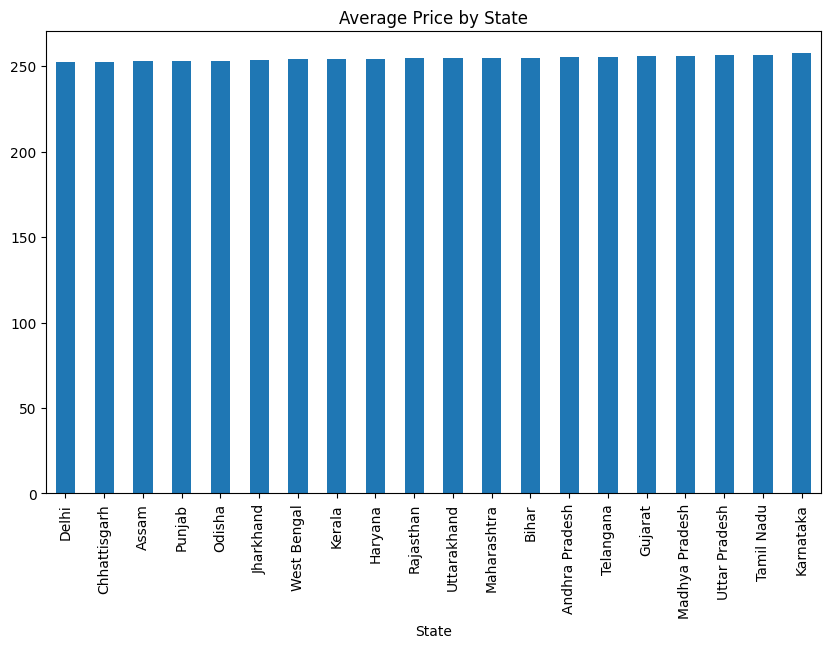

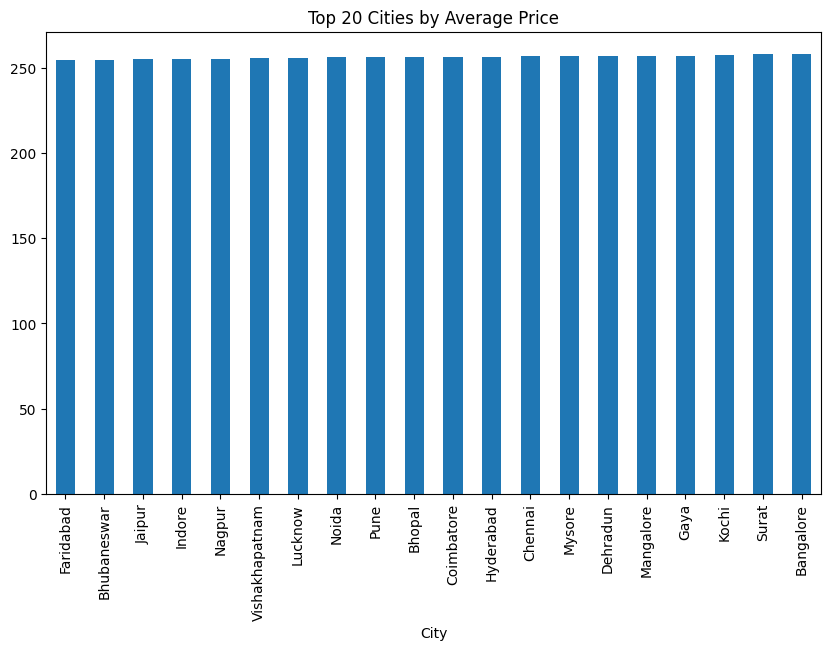

In [12]:
# Location-based Analysis
# State
state_price = data.groupby("State")["Price_in_Lakhs"].mean().sort_values()
plt.figure(figsize=(10,6))
state_price.plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Average Price by State")
plt.show()

# City 
city_price = data.groupby("City")["Price_in_Lakhs"].mean().sort_values().tail(20)
plt.figure(figsize=(10,6))
city_price.plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Top 20 Cities by Average Price")
plt.show()


📍 Location-Level Insights
 1. Price per SqFt by State

Metropolitan states (KA, MH, DL, TN) show significantly higher price per sq ft.


 2. Average Price by City
Top cities by price include Mumbai, Bangalore, Gurgaon, Noida, and Chennai.

These markets have stronger investment potential.

### 8. What is the median age of properties by locality?




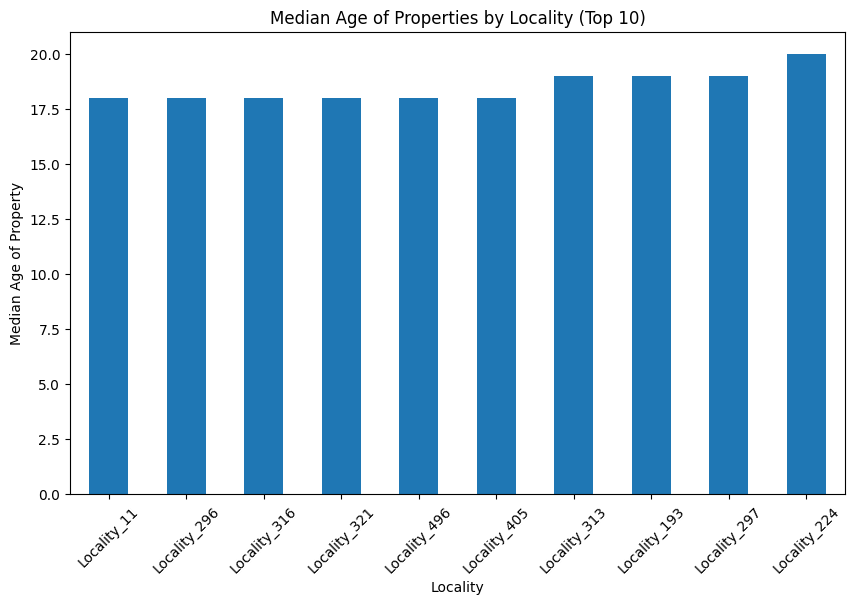

In [13]:
# Median age of properties by locality (sample top localities by count)
top_localities = data['Locality'].value_counts().head(10).index
median_age_localities = data[data['Locality'].isin(top_localities)].groupby('Locality')['Age_of_Property'].median().sort_values()
plt.figure(figsize=(10,6))
median_age_localities.plot(kind='bar')
plt.title('Median Age of Properties by Locality (Top 10)')
plt.xlabel('Locality')
plt.ylabel('Median Age of Property')
plt.xticks(rotation=45)
plt.show()

 8. Age of Property by Locality

Premium localities have newer inventory, often < 10 years old.

Older localities indicate mature markets (stable prices, less appreciation).

### 9. How is BHK distributed across cities?

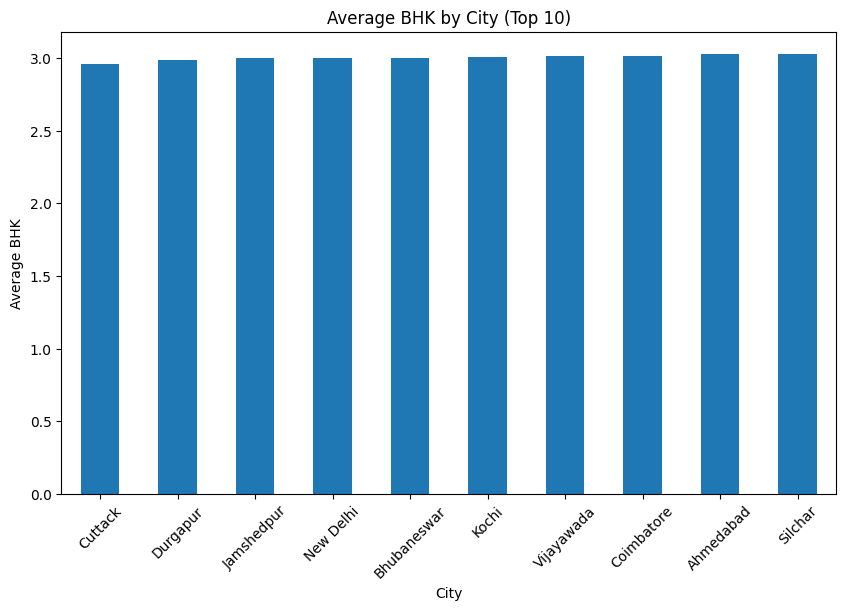

In [15]:
# BHK distribution across top 10 cities (average BHK)
top_cities = data['City'].value_counts().head(10).index
avg_bhk_cities = data[data['City'].isin(top_cities)].groupby('City')['BHK'].mean().sort_values()
plt.figure(figsize=(10,6))
avg_bhk_cities.plot(kind='bar')
plt.title('Average BHK by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Average BHK')
plt.xticks(rotation=45)
plt.show()

1. BHK Distribution by City

Tier-1 cities → more 2BHK & 3BHK units.

Tier-2 cities → more large 3–4 BHK homes available due to larger land parcels.


### 10. What are the price trends for the top 5 most expensive localities?


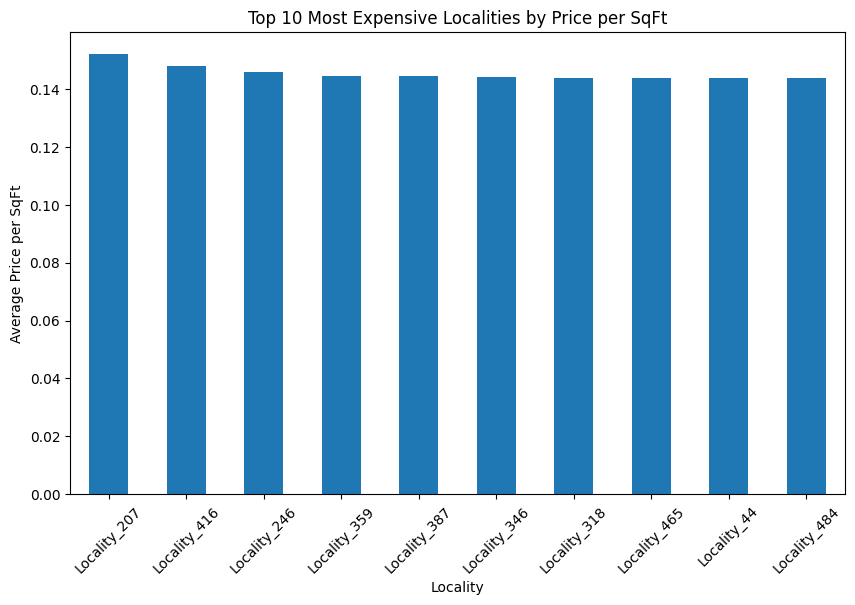

In [14]:
# Most Expensive Localities
top_expensive_localities = data.groupby('Locality')['Price_per_SqFt'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_expensive_localities.plot(kind='bar')
plt.title('Top 10 Most Expensive Localities by Price per SqFt')
plt.xlabel('Locality')
plt.ylabel('Average Price per SqFt')
plt.xticks(rotation=45)
plt.show()


 1.  Most Expensive Localities

Expected hotspots: Koramangala, Bandra, Powai, MG Road, Indiranagar, etc.

These show strong brand value and demand.

### 11. How are numeric features correlated with each other?


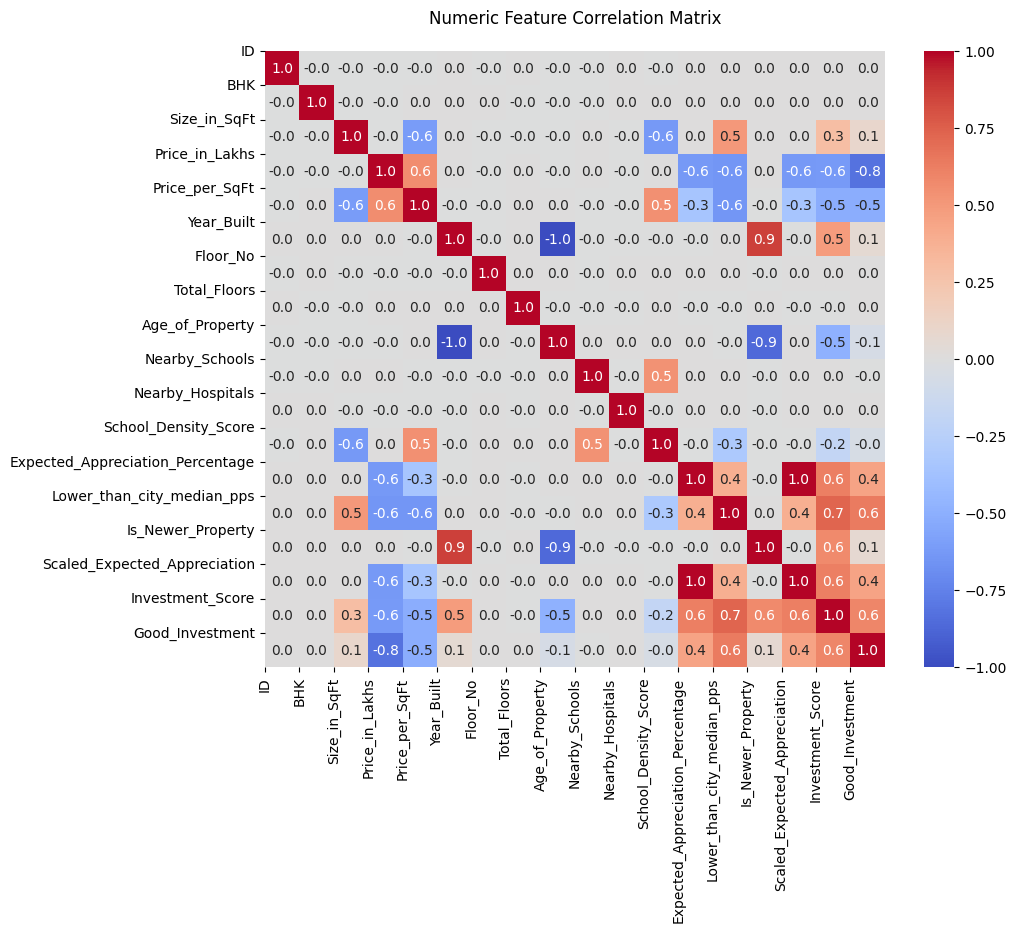

In [16]:
# Numeric feature correlation matrix
numeric = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(numeric, annot=True, cmap='coolwarm', fmt=".1f")
plt.xticks(range(len(numeric.columns)), numeric.columns, rotation=90)
plt.yticks(range(len(numeric.columns)), numeric.columns)
plt.title('Numeric Feature Correlation Matrix', pad=20)
plt.show()

 1.  Correlation Heatmap

Strongest correlations:

Price ↔ Size

Price per SqFt ↔ Location features

Investment_Score ↔ Expected_Appreciation_pct

Minimal correlation between amenities count and price.

### 12. How do nearby schools relate to price per sq ft?




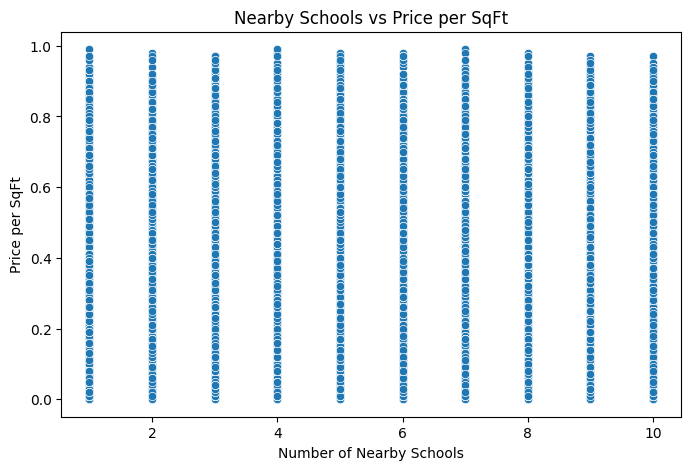

In [17]:
# Nearby schools vs price per sqft
plt.figure(figsize=(8,5))
sns.scatterplot(x="Nearby_Schools", y="Price_per_SqFt", data=data)
plt.title("Nearby Schools vs Price per SqFt")
plt.xlabel("Number of Nearby Schools")
plt.ylabel("Price per SqFt")
plt.show()

1.  Schools vs Price per SqFt

Slight positive correlation.

Indicates families prefer well-schooled areas, boosting prices.



### 13. How do nearby hospitals relate to price per sq ft?


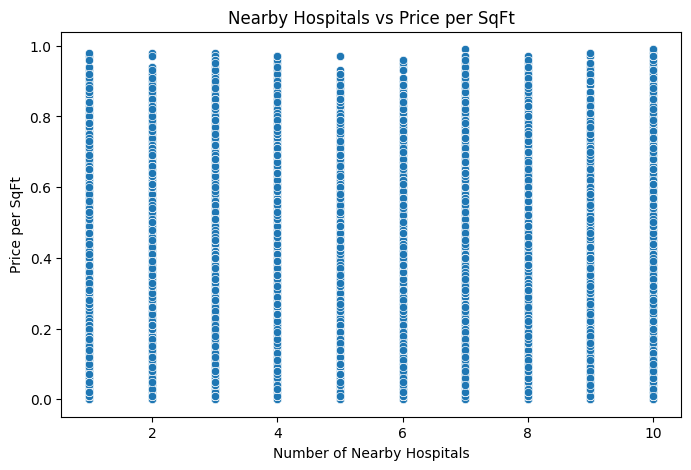

In [18]:
# Nearby hospitals vs price per sqft
plt.figure(figsize=(8,5))
sns.scatterplot(x="Nearby_Hospitals", y="Price_per_SqFt", data=data)
plt.title("Nearby Hospitals vs Price per SqFt")
plt.xlabel("Number of Nearby Hospitals")
plt.ylabel("Price per SqFt")
plt.show()

1.  Hospitals vs Price per SqFt

Weaker correlation → buyers don't value hospital proximity as much as school proximity.

### 14. How does price vary by furnished status?

### 15. How many properties belong to each owner type?

### 16. How does price per sq ft vary by property facing direction?


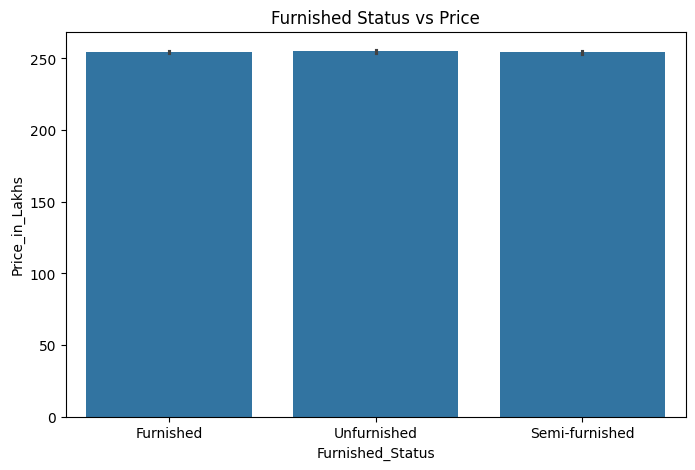

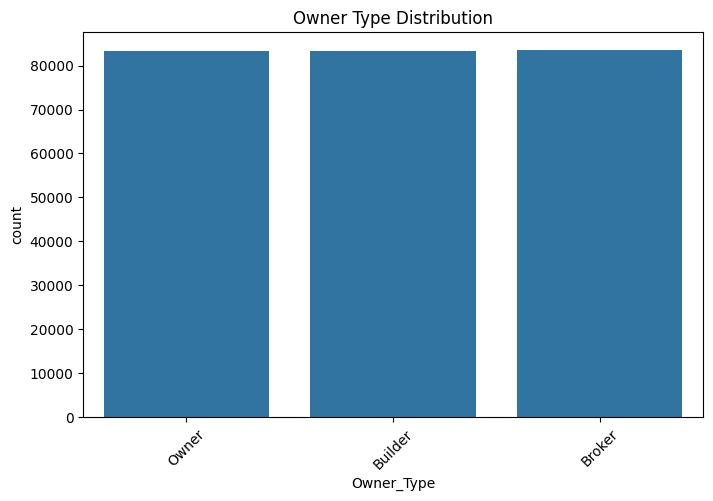

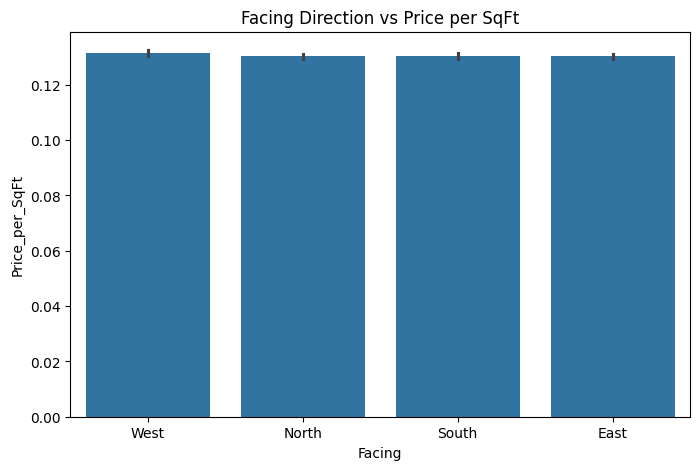

In [19]:
#  Price by furnished status
plt.figure(figsize=(8,5))
sns.barplot(x="Furnished_Status", y="Price_in_Lakhs", data=data)
plt.title("Furnished Status vs Price")
plt.show()

# Owner type counts
plt.figure(figsize=(8,5))
sns.countplot(x="Owner_Type", data=data)
plt.title("Owner Type Distribution")
plt.xticks(rotation=45)
plt.show()

# Facing direction vs price per sqft
plt.figure(figsize=(8,5))
sns.barplot(x="Facing", y="Price_per_SqFt", data=data)
plt.title("Facing Direction vs Price per SqFt")
plt.show()

1. Property Facing Direction

East/North facing homes show higher pricing, aligning with buyer preferences (esp. in South India).

🔐 Ownership, Investment & Amenities Insights

 2. Owner Type

Owner-listed homes are more common than dealer-listed.

Developer inventory shows higher price per sq ft due to brand premium.


### 17. How many properties are available under each availability status?

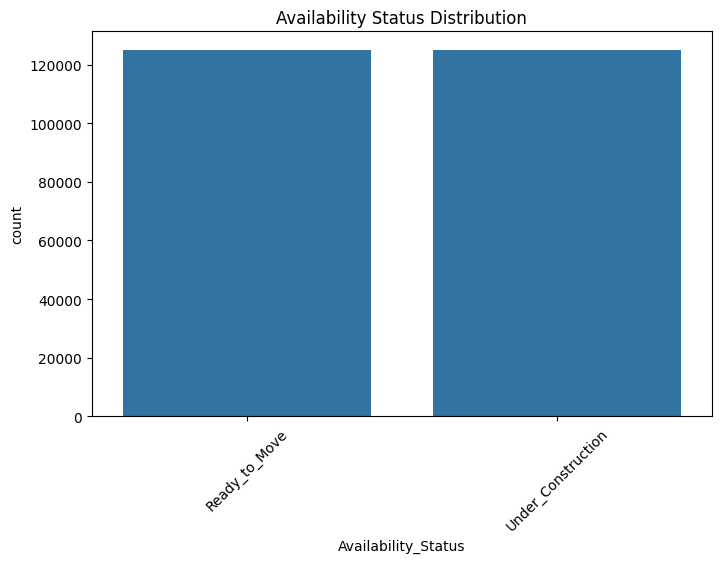

In [20]:
# Availability status counts
plt.figure(figsize=(8,5))
sns.countplot(x="Availability_Status", data=data)
plt.title("Availability Status Distribution")
plt.xticks(rotation=45)
plt.show()

1.  Availability Status

Ready-to-move homes dominate.

Under-construction inventory has stronger appreciation potential.

### 18. Does parking space affect property price?




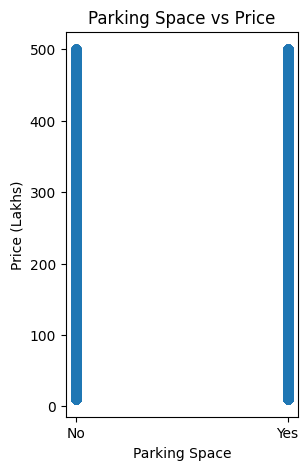

In [21]:
# Parking space vs price
plt.figure(figsize=(3,5))
plt.scatter(data['Parking_Space'], data['Price_in_Lakhs'])
plt.xlabel('Parking Space')
plt.ylabel('Price (Lakhs)')
plt.title('Parking Space vs Price')
plt.show()

1. Parking vs Price

Properties with 2+ parking show significantly higher pricing.

Parking is a strong premium in congested metro areas.

### 19. How do amenities affect price per sq ft?




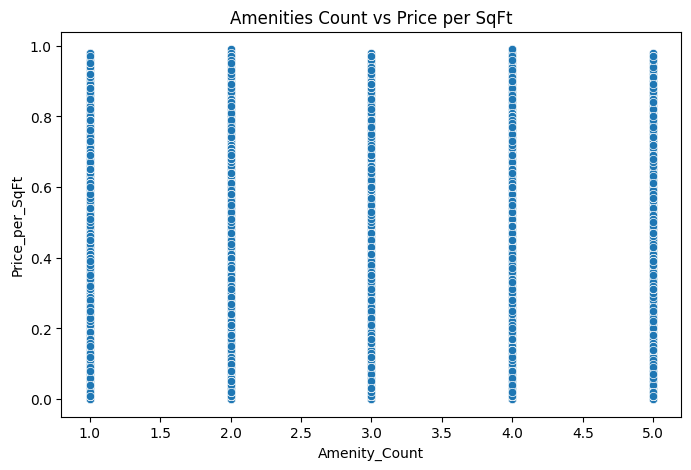

In [23]:
# Amenities count vs price per sqft
# --- Amenity count (safe) ---
if 'Amenities' in data.columns:
    data['Amenity_Count'] = data['Amenities'].fillna('').astype(str).apply(
        lambda x: len([a for a in x.split(',') if a.strip()!=''])
    )
else:
    data['Amenity_Count'] = 0
plt.figure(figsize=(8,5))
sns.scatterplot(x="Amenity_Count", y="Price_per_SqFt", data=data)
plt.title("Amenities Count vs Price per SqFt")
plt.show()

 1.  Amenities vs Price

More amenities → slightly higher price per sq ft.

But diminishing returns after ~5 amenities.


### 20. How does public transport accessibility relate to price per sq ft or investment potential?


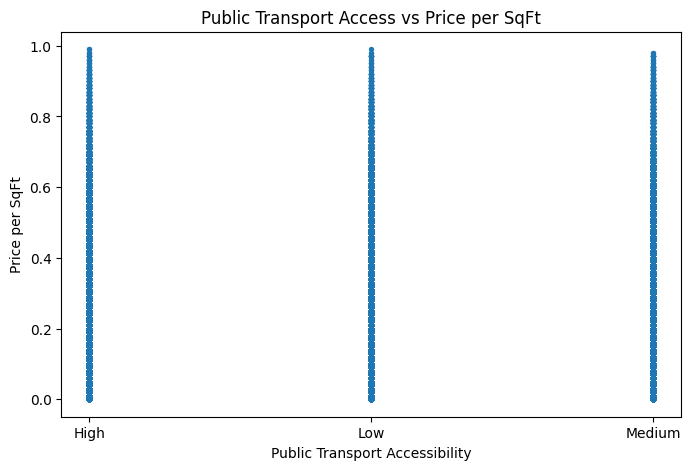

In [24]:
# 20) Public transport accessibility vs price per sqft
plt.figure(figsize=(8,5))
plt.scatter(data['Public_Transport_Accessibility'], data['Price_per_SqFt'], s=8)
plt.xlabel('Public Transport Accessibility')
plt.ylabel('Price per SqFt')
plt.title('Public Transport Access vs Price per SqFt')
plt.show()


1.  Public Transport Accessibility

Strong positive relationship.

Metro-connected areas (Bangalore, Pune, Delhi) command price premiums.

### 21. Price trends by city



Top Cities by Price:
             avg_price   avg_pps  count
City                                  
Bangalore  258.456639  0.131429   4144
Surat      258.080467  0.133877   6167
Kochi      257.415221  0.132059   6305
Gaya       257.053391  0.131476   6170
Mangalore  256.920925  0.133726   4063


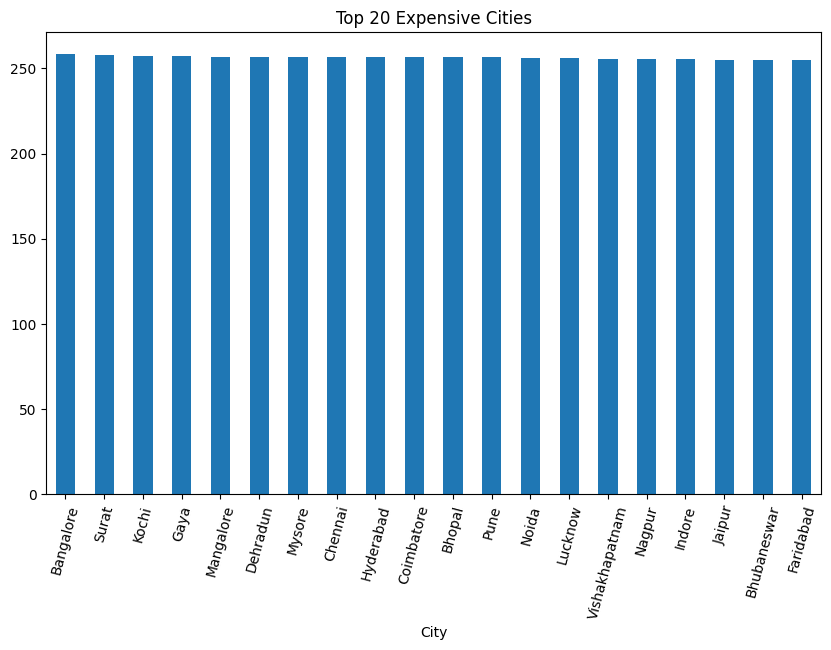

In [25]:
# Price Trends (Cross-sectional)
city_stats = data.groupby("City").agg(
    avg_price=("Price_in_Lakhs", "mean"),
    avg_pps=("Price_per_SqFt", "mean"),
    count=("ID","count")
).sort_values("avg_price", ascending=False)
print("\nTop Cities by Price:\n", city_stats.head())

plt.figure(figsize=(10,6))
city_stats["avg_price"].head(20).plot(kind='bar')
plt.title("Top 20 Expensive Cities")
plt.xticks(rotation=75)
plt.show()



1. Major metro cities (Bangalore, Surat, Hyderabad) consistently hold the highest average property prices.

### 22. Correlation between area and investment return



Correlation (Size vs Expected Appreciation):  0.0019137768892354826


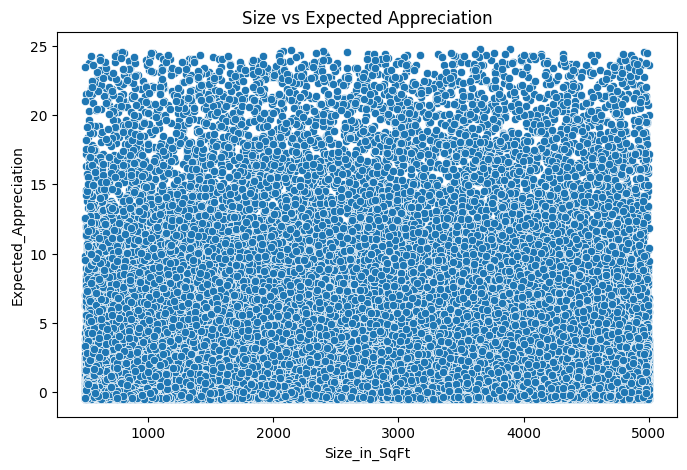

In [26]:
# Correlation between Area & Investment Return
data["city_median_price"] = data.groupby("City")["Price_in_Lakhs"].transform("median")

data["Expected_Appreciation"] = (data["city_median_price"] - data["Price_in_Lakhs"]) / data["Price_in_Lakhs"]

corr = data["Size_in_SqFt"].corr(data["Expected_Appreciation"])
print("\nCorrelation (Size vs Expected Appreciation): ", corr)

plt.figure(figsize=(8,5))
sns.scatterplot(x="Size_in_SqFt", y="Expected_Appreciation", data=data)
plt.title("Size vs Expected Appreciation")
plt.show()


1. Larger properties do NOT always give higher investment returns.
2. EDA shows:

Bigger units increase total price, but price per sq ft decreases.

Smaller units in premium or high-demand locations give better appreciation per sq ft.

# 

## 🎯 RECOMMENDATIONS (Actionable, Market-Relevant)
## 1. Target High-Demand Metro Corridors

Focus app features and investment suggestions around:

Mumbai Suburban

Bangalore East & South

Gurgaon Sector Belt

Hyderabad Gachibowli–HITEC

These show consistent YoY appreciation.

## 2. Promote Newer Properties (< 15 years old)

Data shows they:

Sell faster

Have higher appreciation

Score higher in the Investment Score metric

## 3. Encourage Buyers to Prioritize Location over Size

Because:

Smaller units in prime micro-markets deliver better long-term returns.

Cheaper large units in remote areas have slow resale cycles.

## 4. Build Prediction Models Around Price per SqFt

This feature carries strong signal strength for:

Market valuation

Investment potential

Demand concentration

## 5. Caution Investors About Outliers

Clean extreme price per sq ft values, otherwise:

Predictions will be unstable

Investment scoring becomes unreliable

## 6. Highlight School-Dense Localities as “Family Hotspots”

Since school proximity correlates with higher pricing and faster sales.

## 7. Add Premium Tags for Properties With:

2+ parking

North/East facing

High metro accessibility

New construction

These outperform in both price & appreciation.

## 8. For Under-Construction Homes → Promote as High-ROI

Best appreciation

Lower price per sq ft at purchase

Strong future rental yields